# HTML Parser for the Reliance dataset

## load the feature and data extreaction libraries

In [20]:
import json
import pandas as pd
import os
from bs4 import BeautifulSoup
import seaborn as sns

## Create a function for collecting HTML from Json

In [2]:
def json_reader(json_file):
    f=open(json_file)
    json_info = json.load(f)
    html_info = []
    for i in json_info:
        section=i
        html_data= section.get('html')
        html_info.append(html_data)
    return html_info

## Create a function to collected the tables and conusmer informaiton from the HTML

In [3]:
def clean_capture(web_html_file):
    #Capture tables from web
    soup = BeautifulSoup(web_html_file,'lxml')
    keywords = soup.find_all("table")[0].find_all("tr")[1:]
    keyword_data = []
    
    #Collect the information about the consumer shopping
    for element in keywords:
        sub_data=[]
        for sub_element in element:
            try:
                sub_data.append(sub_element.get_text())
            except:
                continue
        keyword_data.append(sub_data)
        
    
    #Clean the final keyword dataset
    final_data=[]
    for value in keyword_data:
        if len(value)>1:
            final_data.append(value)
            
    
    return final_data

## Create a funciton to clean the text and load the informaiton into new dictionary 

In [31]:
def create_dict(clean_text):
    #Define dictionary
    dictnory ={'product_name':[],'qty':[], 'location':[],'payment_mode':[],'price':[]}
    #bad char remove part
    bad_char = [':',';','*','₹',',','\xa0']
    for i in range(len(clean_text)-1):
        text = clean_text[i]
        
        #load the information about the product detailed and qty and price
        if len(text)>4:
            if text[0] !='Product Details':
                #Load the information about product name
                product= clean_text[i]
                dictnory['product_name'].append(product[1])
                #Qty orderd
                qty = product[2]
                dictnory['qty'].append(qty)
                #Price of product
                price = product[4]
                for bd in bad_char:
                    price=price.replace(bd,'')
                dictnory['price'].append(float(price))
                
        elif text[0] =='Shipment Details':
            add = clean_text[i+1]
            dictnory['location'].append(int(add[1][-29:-23]))
            
        elif text[0] =='Order Details':
            add = clean_text[i+1]
            dictnory['location'].append(add[1][-29:-23])
        elif text[0] == 'Payment Mode:':
            dictnory['payment_mode'].append(text[1])
            
    #If some values are missing then trasnfer to default location    
    default_loc = [400004]
    if len(dictnory['location'])<1:
        dictnory['location'] =default_loc
    if len(dictnory['payment_mode'])<1:
        dictnory['payment_mode'] =['Credit Card']      
    #Create a dataframe
    for i in range(len(dictnory['product_name'])-1):
        dictnory['location'].append(dictnory['location'][0])
        dictnory['payment_mode'].append(dictnory['payment_mode'][0])
#     print(dictnory)
    
    if len(dictnory['product_name']) >=1:
        df = pd.DataFrame(dictnory)
        return df

## Create a function to collecte the informaiton in dataframe

In [32]:
def dataframe_creation(web_dictonary):
    consumer_df =[]
    for i in web_dictonary:
        if len(i)>1000:
            clean_info =clean_capture(i)
#             print(clean_info)
            dic =create_dict(clean_info)
            consumer_df.append(dic)
#     print(consumer_df)        
    final_df = pd.concat(consumer_df,axis=0,ignore_index=True)
    return final_df

## Load the Json file and collected the consumer informaiton in the dataframe

In [33]:
final_df = []
data_files = [fname for fname in os.listdir('reliance_inter/')]
for i in data_files:
    location = ('reliance_inter/'+i)
    print(location)
    web_info = json_reader(location)
    df_intial= dataframe_creation(web_info)
    df_intial['Time']=location[15:33]
    final_df.append(df_intial)
    
reliance_df = pd.concat(final_df, axis=0, ignore_index=True)

reliance_inter/year-2021_month-05_part-1_without_pii.json
reliance_inter/year-2021_month-06_part-1_without_pii.json
reliance_inter/year-2021_month-07_part-1_without_pii.json
reliance_inter/year-2021_month-08_part-1_without_pii.json
reliance_inter/year-2021_month-09_part-1_without_pii.json
reliance_inter/year-2021_month-10_part-1_without_pii.json
reliance_inter/year-2021_month-11_part-1_without_pii.json
reliance_inter/year-2021_month-12_part-1_without_pii.json
reliance_inter/year-2022_month-01_part-1_without_pii.json


## Store the file in .CSV

In [34]:
reliance_df.to_csv('Reliance_consumers_info.csv')

## Data visulisation on type of payment mehtods used by consumers

In [35]:
import matplotlib.pyplot as plt
from matplotlib import style

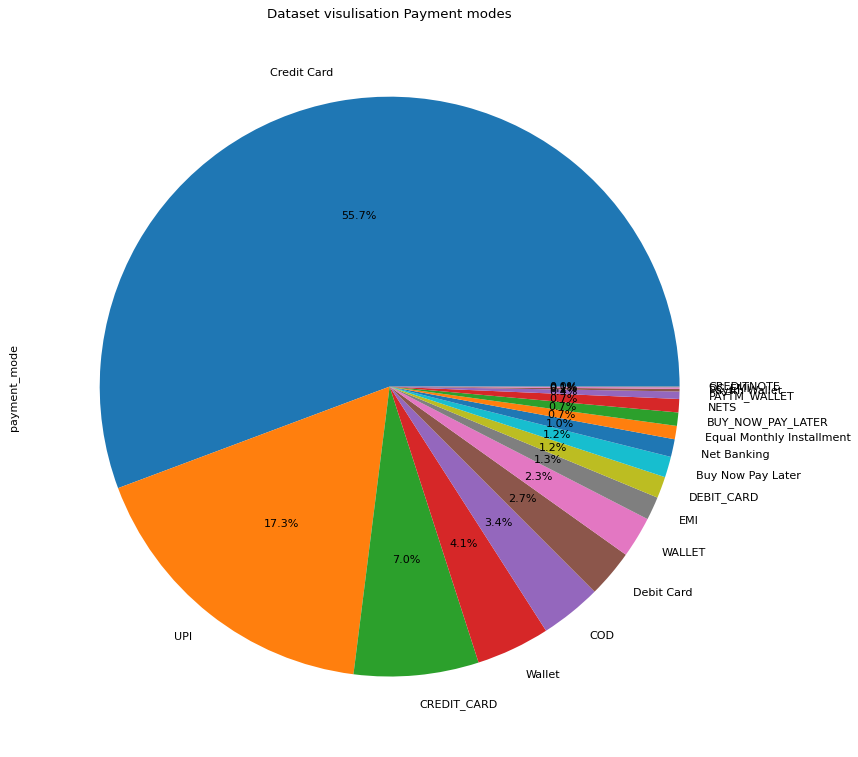

In [36]:
Y_data = reliance_df['payment_mode']
#Data visulisation of samples in each class
plt.figure(figsize=(16,12),dpi=80,)
plt.title('Dataset visulisation Payment modes')
zz=Y_data.value_counts().plot(kind='pie', autopct = '%1.1f%%')
plt.tick_params(axis='x',labelsize=14)
plt.tick_params(axis='y',labelsize=14)
plt.grid(which='major',color='y', linestyle='--')
plt.show()

## Monthy data analysis for each location

### May month sales analysis

In [37]:
test = final_df[0]
a = test.groupby('payment_mode')['payment_mode'].count()
print(a)

payment_mode
CREDIT_CARD      19
Credit Card     174
DC_EMI            1
DEBIT_CARD        9
Debit Card        8
EMI              22
NETS              4
Net Banking       6
PAYTM_WALLET      6
Paytm Wallet      5
UPI              39
Name: payment_mode, dtype: int64


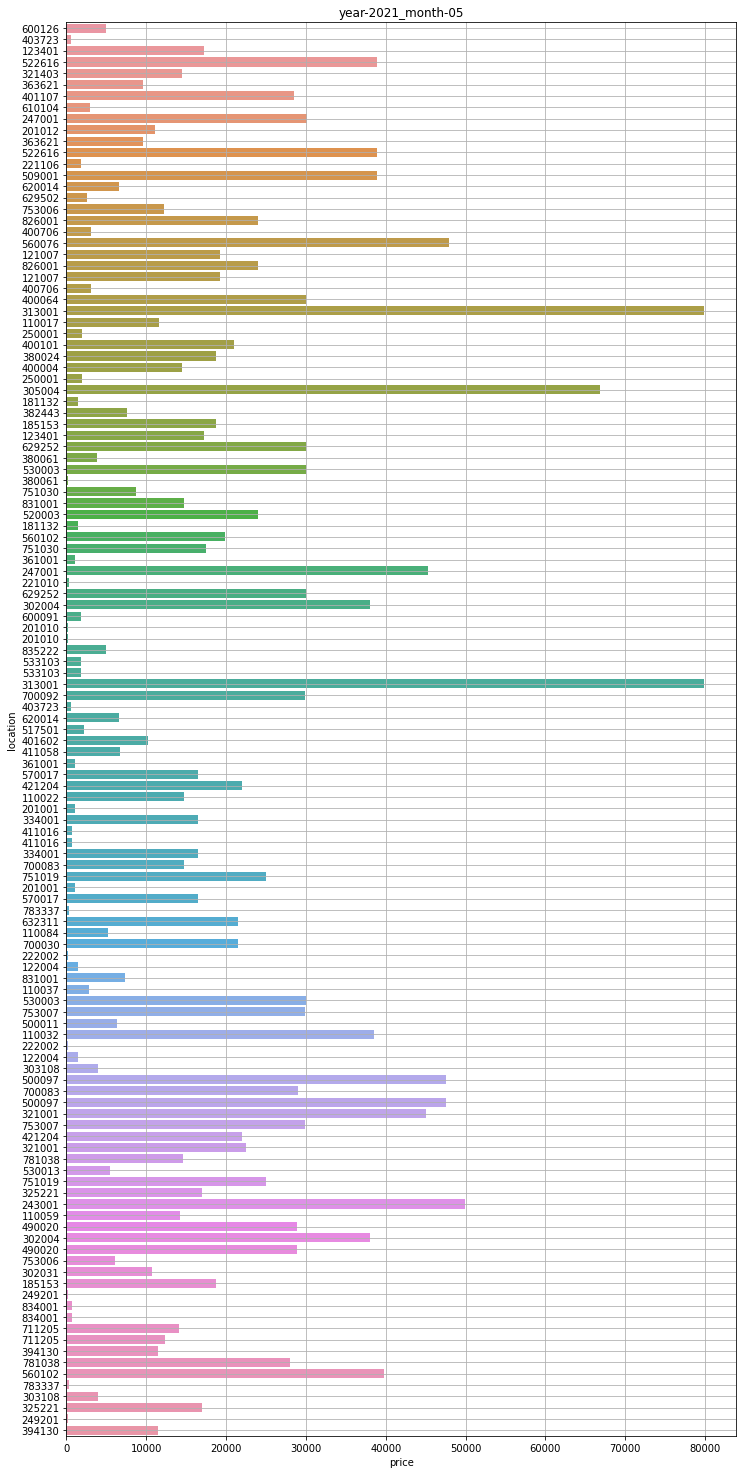

In [11]:
test = final_df[0]
a = test['price']
b = test['location']
plt.figure(figsize=(12,26))
g =sns.barplot(x=a, y=b, data=test, ci=None).set(title=test['Time'][0])
plt.grid()

### June month analysis

In [38]:
test = final_df[1]
a = test.groupby('payment_mode')['payment_mode'].count()
print(a)

payment_mode
COD                            4
CREDIT_CARD                   48
Credit Card                  243
DC_EMI                         1
DEBIT_CARD                     5
EMI                           13
Equal Monthly Installment     12
NETS                           1
Net Banking                    6
PAYTM_WALLET                  12
UPI                           24
Name: payment_mode, dtype: int64


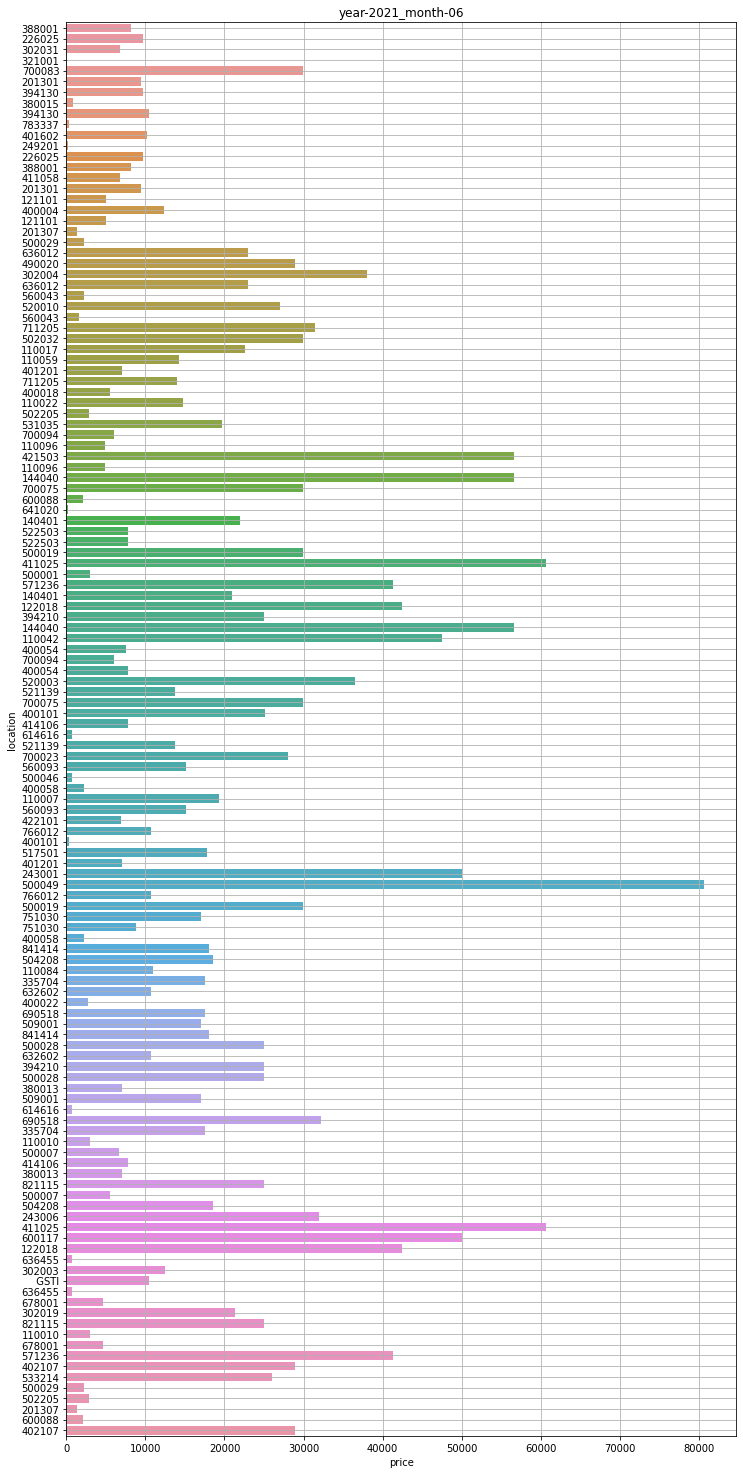

In [39]:
test = final_df[1]
a = test['price']
b = test['location']
plt.figure(figsize=(12,26))
g =sns.barplot(x=a, y=b, data=test, ci=None).set(title=test['Time'][0])
plt.grid()

### July month data analysis

In [40]:
test = final_df[0]
a = test.groupby('payment_mode')['payment_mode'].count()
print(a)

payment_mode
CREDIT_CARD      19
Credit Card     174
DC_EMI            1
DEBIT_CARD        9
Debit Card        8
EMI              22
NETS              4
Net Banking       6
PAYTM_WALLET      6
Paytm Wallet      5
UPI              39
Name: payment_mode, dtype: int64


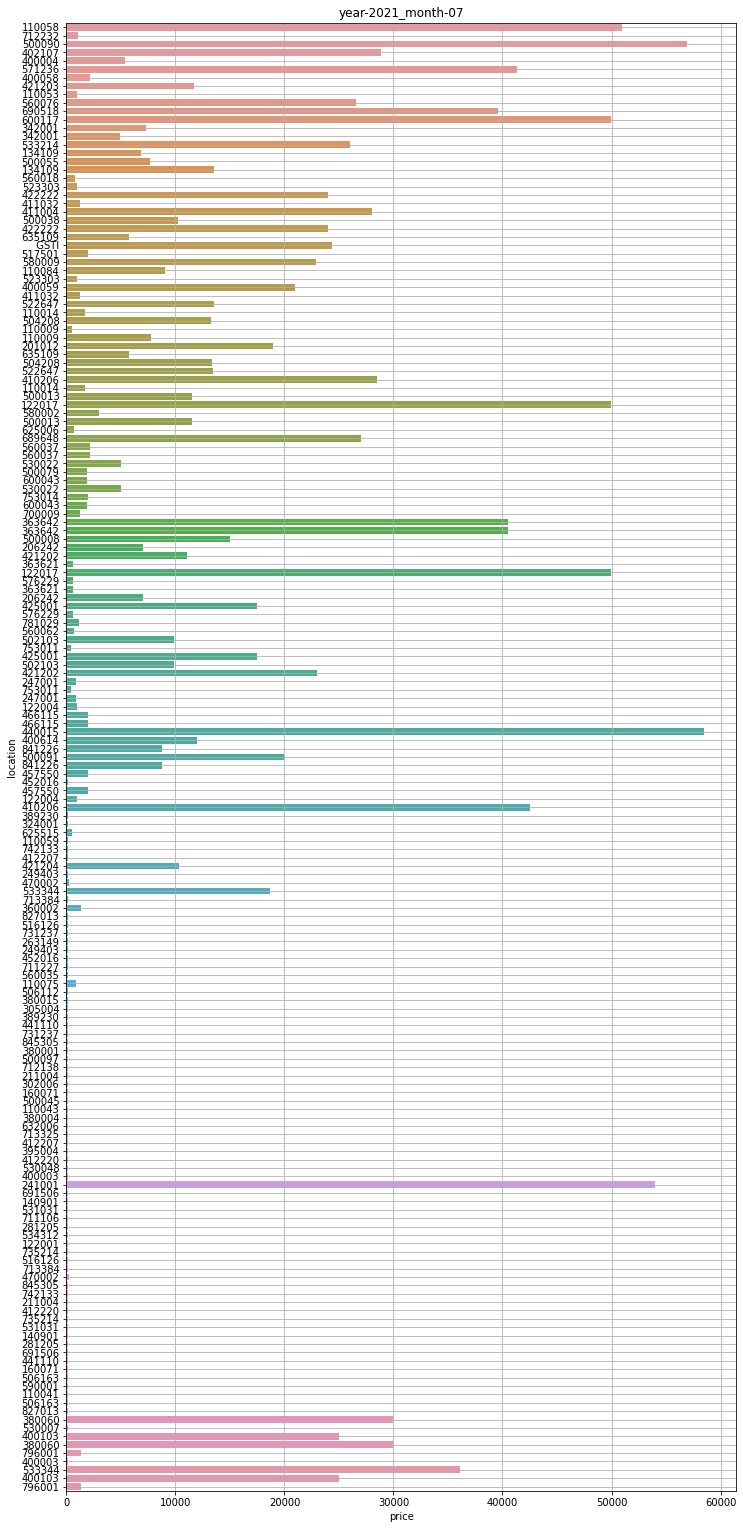

In [13]:
test = final_df[2]
a = test['price']
b = test['location']
plt.figure(figsize=(12,27))
g =sns.barplot(x=a, y=b, data=test, ci=None).set(title=test['Time'][0])
plt.grid()

### August Month data analysis

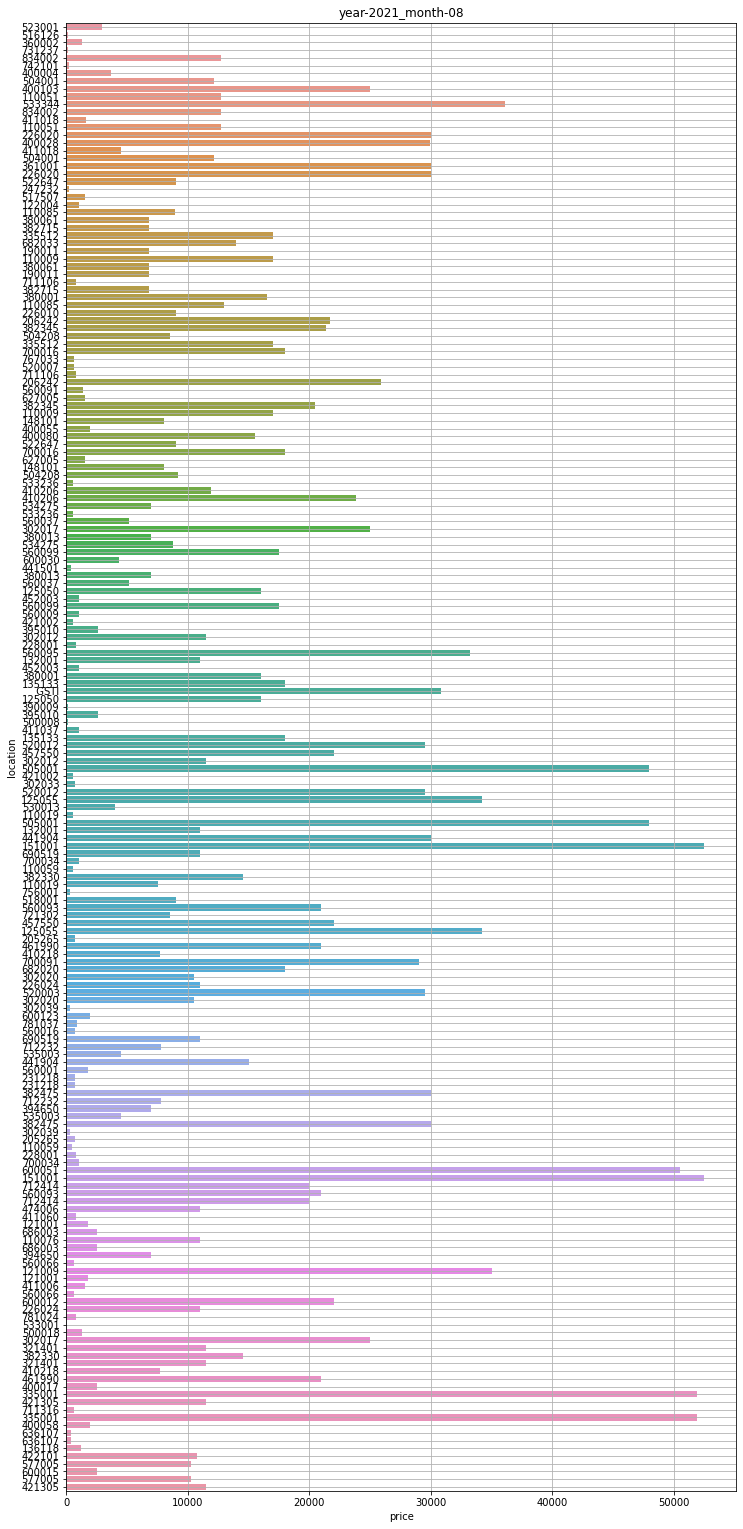

In [14]:
test = final_df[3]
a = test['price']
b = test['location']
plt.figure(figsize=(12,27))
g =sns.barplot(x=a, y=b, data=test, ci=None).set(title=test['Time'][0])
plt.grid()

### September data analysis

In [41]:
test = final_df[0]
a = test.groupby('payment_mode')['payment_mode'].count()
print(a)

payment_mode
CREDIT_CARD      19
Credit Card     174
DC_EMI            1
DEBIT_CARD        9
Debit Card        8
EMI              22
NETS              4
Net Banking       6
PAYTM_WALLET      6
Paytm Wallet      5
UPI              39
Name: payment_mode, dtype: int64


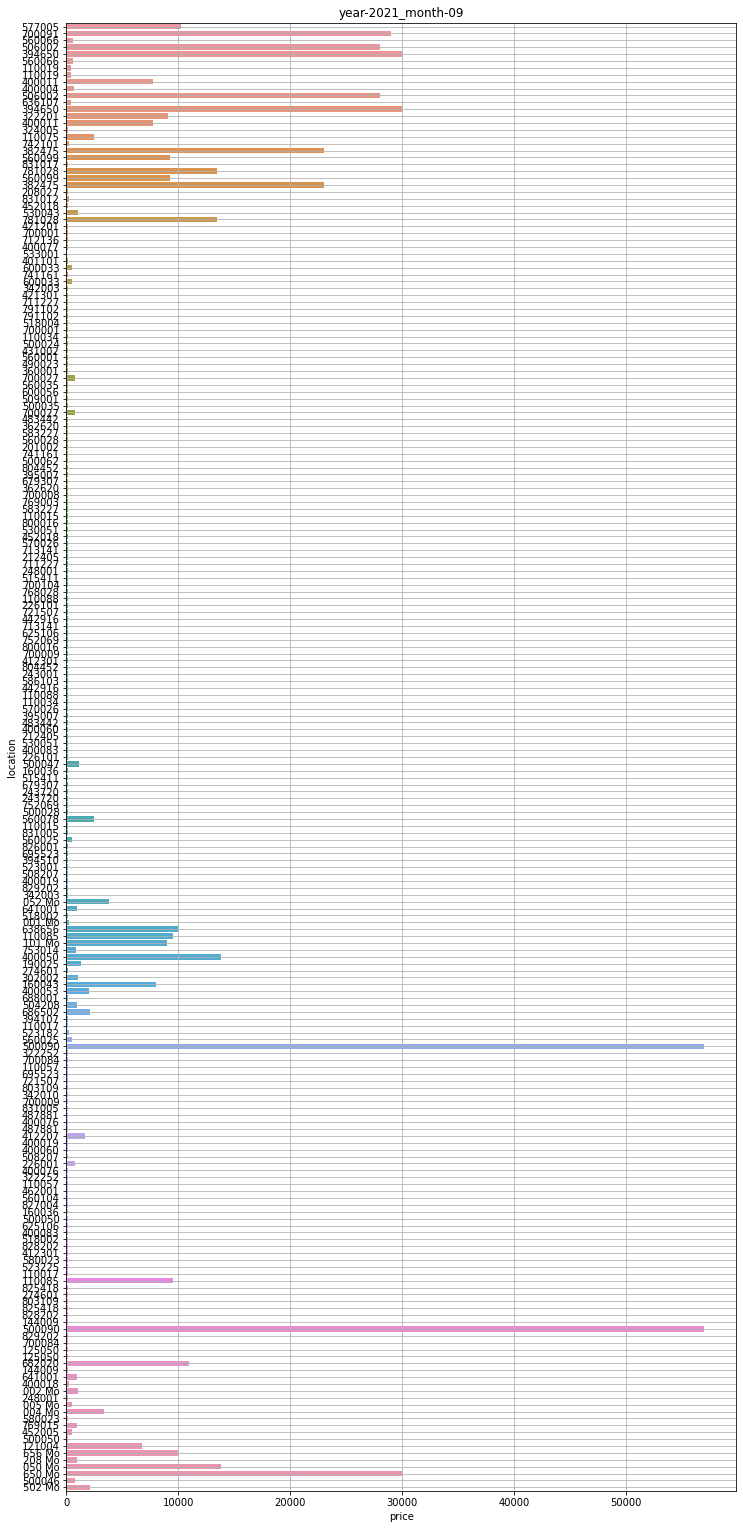

In [15]:
test = final_df[4]
a = test['price']
b = test['location']
plt.figure(figsize=(12,27))
g =sns.barplot(x=a, y=b, data=test, ci=None).set(title=test['Time'][0])
plt.grid()

### October month data analysis

In [43]:
test = final_df[5]
a = test.groupby('payment_mode')['payment_mode'].count()
print(a)

payment_mode
COD                           11
CREDIT_CARD                   23
Credit Card                  187
DEBIT_CARD                     4
Debit Card                    12
EMI                            6
Equal Monthly Installment      2
NETS                           1
Net Banking                    6
UPI                           38
WALLET                         9
Wallet                        11
Name: payment_mode, dtype: int64


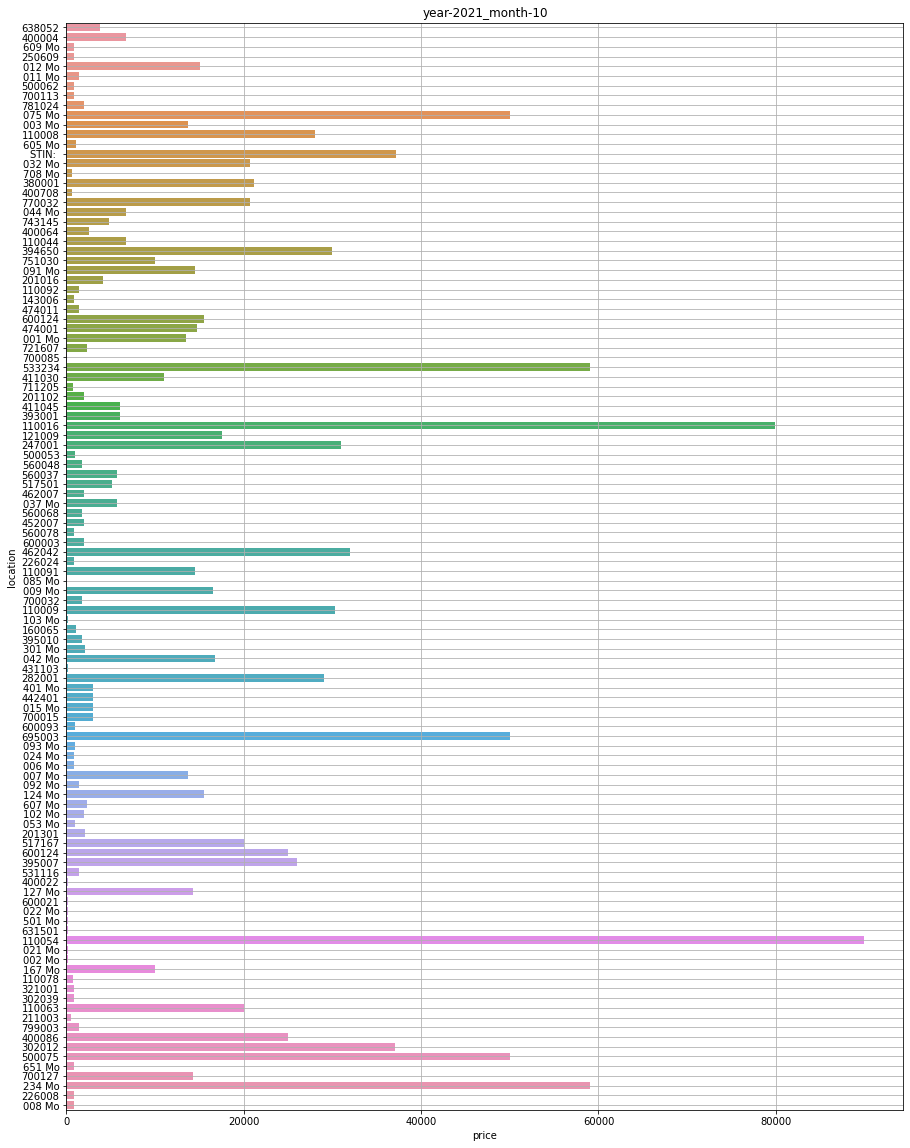

In [16]:
test = final_df[5]
a = test['price']
b = test['location']
plt.figure(figsize=(15,20))
g =sns.barplot(x=a, y=b, data=test, ci=None).set(title=test['Time'][0])
plt.grid()

### November data analysis

In [44]:
test = final_df[6]
a = test.groupby('payment_mode')['payment_mode'].count()
print(a)

payment_mode
BUY_NOW_PAY_LATER              7
Buy Now Pay Later              6
COD                           17
CREDIT_CARD                   18
Credit Card                  179
DEBIT_CARD                     7
Debit Card                    15
EMI                            3
Equal Monthly Installment      4
Net Banking                    4
UPI                           48
WALLET                         2
Wallet                        22
Name: payment_mode, dtype: int64


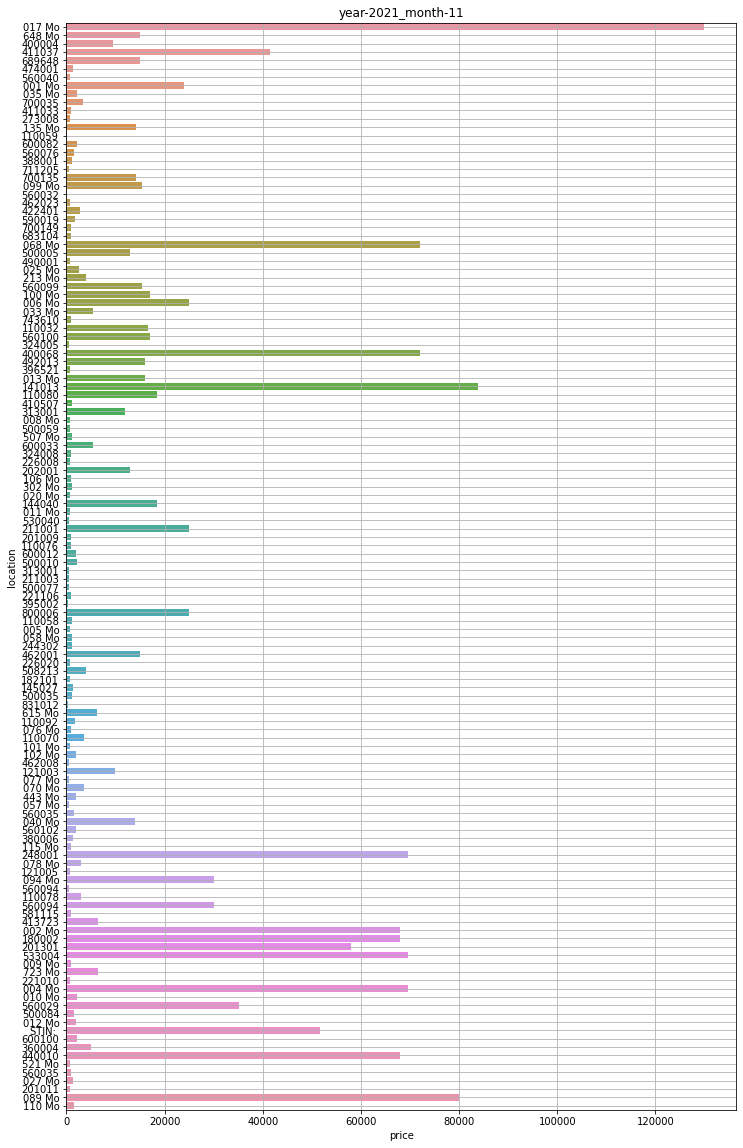

In [17]:
test = final_df[6]
a = test['price']
b = test['location']
plt.figure(figsize=(12,20))
g =sns.barplot(x=a, y=b, data=test, ci=None).set(title=test['Time'][0])
plt.grid()

### December data analysis

In [45]:
test = final_df[7]
a = test.groupby('payment_mode')['payment_mode'].count()
print(a)

payment_mode
BUY_NOW_PAY_LATER     10
Buy Now Pay Later     22
COD                    7
CREDITNOTE             1
CREDIT_CARD           12
Credit Card          141
DEBIT_CARD             1
Debit Card             3
EMI                    4
NETS                   2
Net Banking            3
UPI                   47
WALLET                 6
Wallet                10
Name: payment_mode, dtype: int64


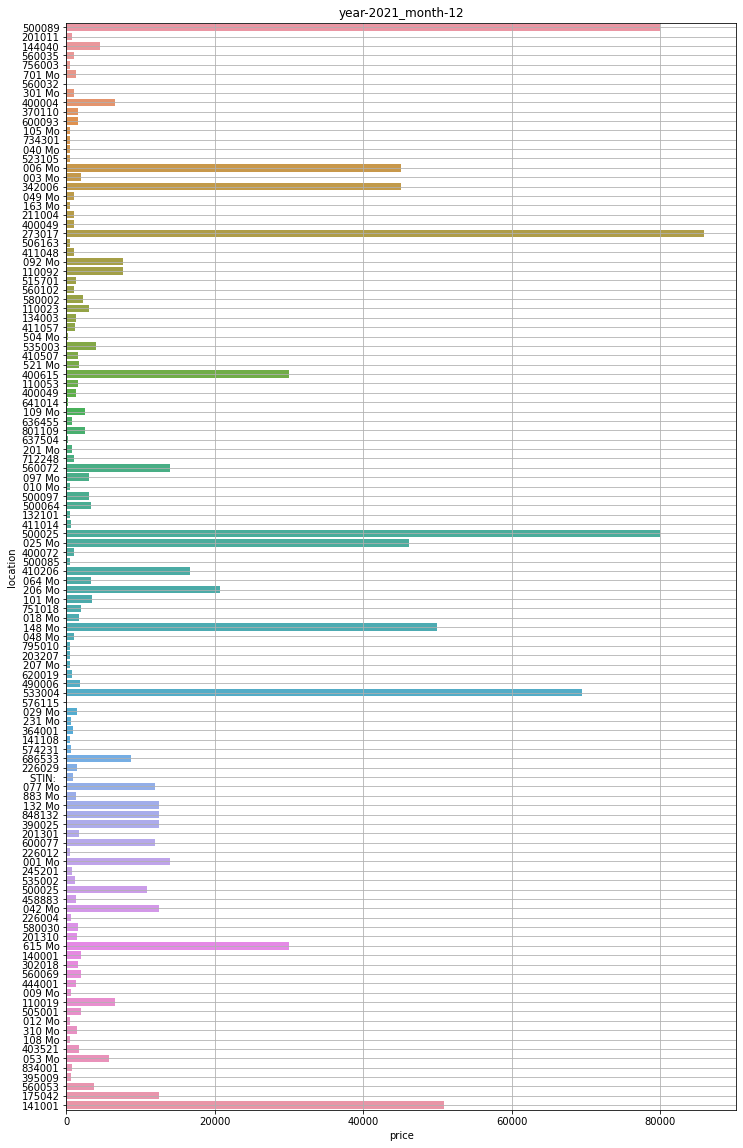

In [18]:
test = final_df[7]
a = test['price']
b = test['location']
plt.figure(figsize=(12,20))
g =sns.barplot(x=a, y=b, data=test, ci=None).set(title=test['Time'][0])
plt.grid()

### January data analysis

In [46]:
test = final_df[8]
a = test.groupby('payment_mode')['payment_mode'].count()
print(a)

payment_mode
BUY_NOW_PAY_LATER             19
Buy Now Pay Later             28
COD                           96
CREDIT_CARD                   57
Credit Card                  799
DC_EMI                         1
DEBIT_CARD                     6
Debit Card                    31
EMI                            2
Equal Monthly Installment      5
NETS                          13
Net Banking                   13
UPI                          329
WALLET                        55
Wallet                        63
Name: payment_mode, dtype: int64


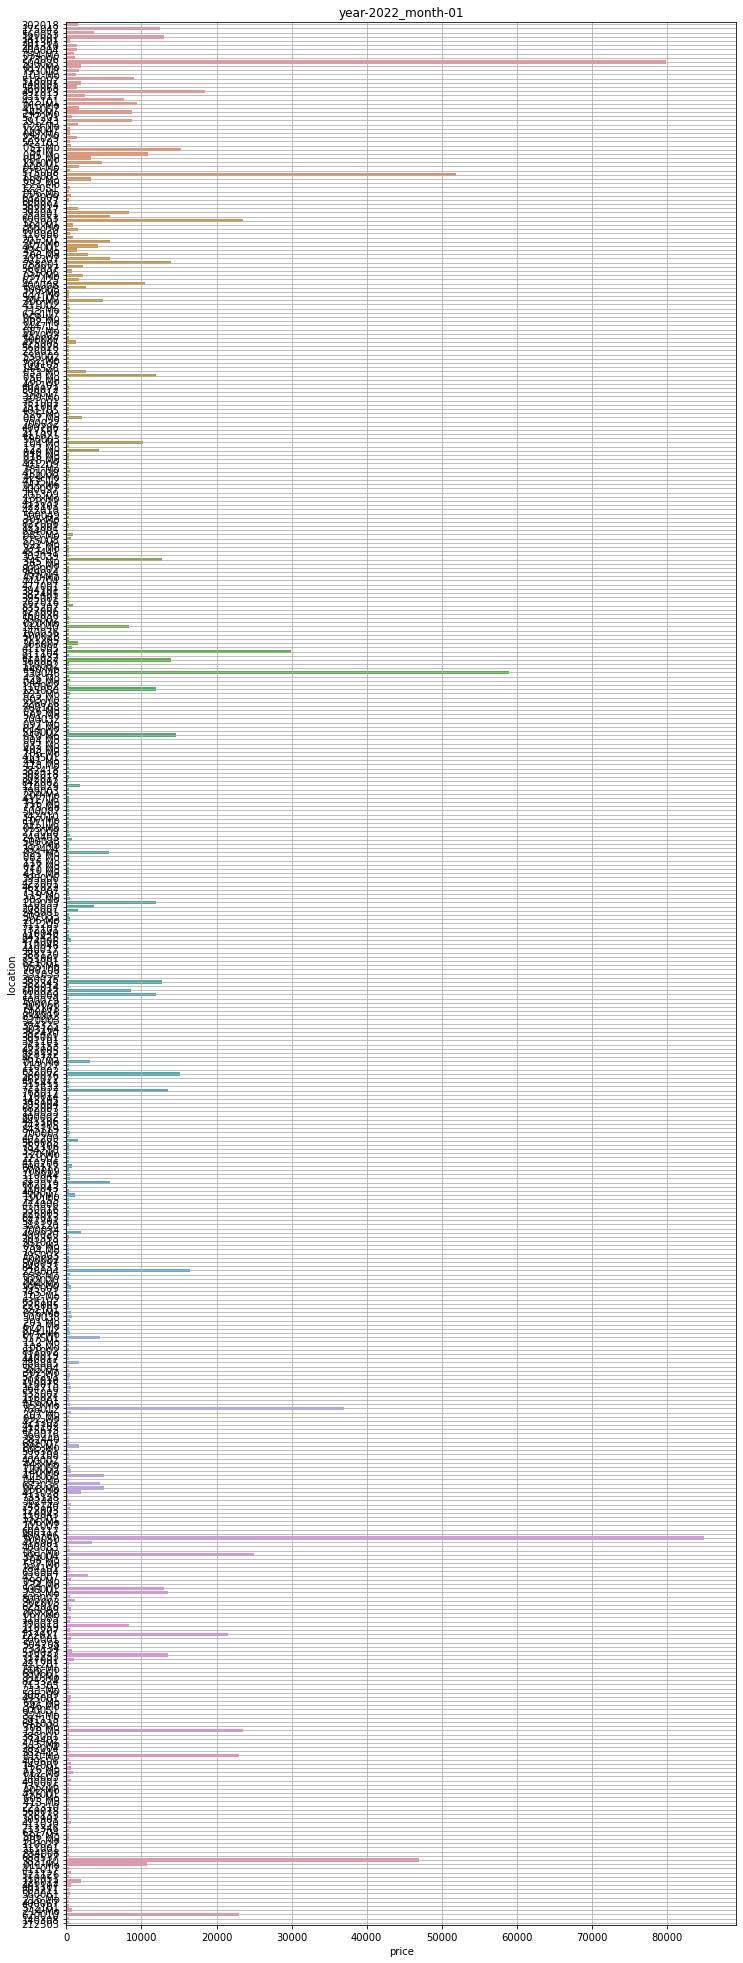

In [19]:
# %matplotlib
test = final_df[8]
a = test['price']
b = test['location']
plt.figure(figsize=(12,35))
g =sns.barplot(x=a, y=b, data=test, ci=None).set(title=test['Time'][0])
plt.grid()

## Use cases for apply machine learining on the dataset

From this dataset, we get inflammation about the consumer shopping habits and, from which particular location more people are purchasing from the website, their payment methods to analyze the type of consumer. In this dataset, we can explore that more consumers are utilizing credit cards and UPI payment methods. From the monthly sales data analysis, more peoples are interested in buying stuff during the Indian festivals in October. During the Diwali festival, more people buy their property from various locations. During the off-season, most of the tear-one and tear-two city people are buying online.

Further, this data can be utilized for the time series analysis to analyze in which month and location people purchase stuff. From this predictive information, the online store can buy their goods from the industry at a lower price and store; During the festive and pick demand, they can sell these goods, earn good profits, and provide better customer service by delivering on time.

For a better product prediction analysis, first, the NER-based NLP method is needed to collect more information about the product name and most repetitive brands, which consumers like to purchase more often. Based on this information machine learning model can be developed. For example, more people are buying AC and Refrigerators during the summer season. So based on the time-series analysis, we can understand which brand product was on hot sell the previous year. Based on this information, shopping website organization can order and purchases item in advance at a lower price, and during the season, they can sell at a reasonable price. Their profit margin will be on the higher side.

One of the drawback for this data set is based on HTML informaiton we can extract the infoamtion about the product type and quntity orderd and many other infoamtion somehow for this dataset itis unableto work so based on the datastructre formate the dataset is extrected and stored into csv file.